In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import os
import tensorflow as tf
#import gym
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, InputLayer
from sklearn.model_selection import train_test_split
from finta import TA
sequence_length = 14

2024-04-06 05:13:44.484615: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-06 05:13:46.093881: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
tickers_negro = [
    ("NVDA", "2012-01-01", "2023-12-31"),
    ("INTC", "2012-01-01", "2023-12-31"),
    ("FRT", "2012-01-01", "2023-12-31"),
    ("NKE", "2012-01-01", "2023-12-31"),
    ("TSM", "2012-01-01", "2023-12-31"),
    ("USB", "2012-01-01", "2023-12-31"),
    ("XOM", "2012-01-01", "2023-12-31"),
    ("BA", "2012-01-01", "2023-12-31"),
    ("NEM", "2012-01-01", "2023-12-31"),
    ("HBAN", "2012-01-01", "2023-12-31"),

    ("VZ", "2012-01-01", "2023-12-31"),
    ("PCG", "2012-01-01", "2023-12-31"),
    ("FCX", "2012-01-01", "2023-12-31"),
    ("C", "2012-01-01", "2023-12-31"),
    ("OXY", "2012-01-01", "2023-12-31"),
    ("KEY", "2012-01-01", "2023-12-31"),
    ("WFC", "2012-01-01", "2023-12-31"),
    ("MRO", "2012-01-01", "2023-12-31"),
    ("GOOGL", "2012-01-01", "2023-12-31"),
    ("NFLX", "2012-01-01", "2023-12-31"),

    ("HDB", "2012-01-01", "2023-12-31"),
    ("MU", "2012-01-01", "2023-12-31"),
    ("AVY", "2012-01-01", "2023-12-31"),
    ("MET", "2012-01-01", "2023-12-31"),
    ("MSTR", "2012-01-01", "2023-12-31"),
    ("WMB", "2012-01-01", "2023-12-31"),
    ("BSX", "2012-01-01", "2023-12-31"),
    ("EBAY", "2012-01-01", "2023-12-31"),
    ("SO", "2012-01-01", "2023-12-31"),
    ("CTSH", "2012-01-01", "2023-12-31"),

    ("BBWI", "2012-01-01", "2023-12-31"),
    ("V", "2012-01-01", "2023-12-31"),
    ("VFC", "2012-01-01", "2023-12-31"),
    ("MOS", "2012-01-01", "2023-12-31"),
    ("CRM", "2012-01-01", "2023-12-31"),
    ("SCHW", "2012-01-01", "2023-12-31"),
    ("CNP", "2012-01-01", "2023-12-31"),
    ("MDT", "2012-01-01", "2023-12-31"),
    ("EXC", "2012-01-01", "2023-12-31"),
    ("MTCH", "2012-01-01", "2023-12-31"),

    ("PARA", "2012-01-01", "2023-12-31"),
    ("UAL", "2012-01-01", "2023-12-31"),
    ("JNJ", "2012-01-01", "2023-12-31"),
    ("LUV", "2012-01-01", "2023-12-31"),
    ("MCD", "2012-01-01", "2023-12-31"),
    ("JPM", "2012-01-01", "2023-12-31"),
    ("GILD", "2012-01-01", "2023-12-31"),
    ("CVS", "2012-01-01", "2023-12-31"),
    ("ORCL", "2012-01-01", "2023-12-31"),
    ("UHS", "2012-01-01", "2023-12-31")
]


In [3]:
# Descargar los precios
tickers_with_dates = [
    ("AAPL", "2012-01-01", "2023-12-31"),
    ("MSFT", "2012-01-01", "2023-12-31"),
    ("AMZN", "2012-01-01", "2023-12-31"),
    ("GOOG", "2012-01-01", "2023-12-31"),
    ("TSLA", "2012-01-01", "2023-12-31"),
    ("META", "2012-01-01", "2023-12-31"),
    ("JNJ", "2012-01-01", "2023-12-31"),
    ("BAC", "2012-01-01", "2023-12-31"),
    ("JPM", "2012-01-01", "2023-12-31"),
    ("NVDA", "2012-01-01", "2023-12-31"),
    ("TSM", "2012-01-01", "2023-12-31"),
    ("BABA", "2012-01-01", "2023-12-31"),
    ("ADBE", "2012-01-01", "2023-12-31"),
    ("CRM", "2012-01-01", "2023-12-31"),
    ("WMT", "2012-01-01", "2023-12-31"),
    ("DIS", "2012-01-01", "2023-12-31"),
    ("KO", "2012-01-01", "2023-12-31"),
    ("PG", "2012-01-01", "2023-12-31"),
    ("VZ", "2012-01-01", "2023-12-31"),
    ("XOM", "2012-01-01", "2023-12-31"),
    ("CVX", "2012-01-01", "2023-12-31"),
    ("INTC", "2012-01-01", "2023-12-31"),
    ("PFE", "2012-01-01", "2023-12-31"),
    ("UNH", "2012-01-01", "2023-12-31"),
    ("COST", "2012-01-01", "2023-12-31"),
    ("HD", "2012-01-01", "2023-12-31"),
    ("MCD", "2012-01-01", "2023-12-31"),
    ("PEP", "2012-01-01", "2023-12-31"),
    ("MA", "2012-01-01", "2023-12-31")
]

datas = {}
for i in tickers_negro:

    try:
        # Attempt to download data for the ticker
        datas[i[0]] = yf.download(i[0], start=i[1], end=i[2], interval="1d")
    except yf.TickerNotFound:
        print(f"{i[0]}: Ticker not found")
    
# data = yf.download('AAPL', start='2005-9-29', end='2024-01-01', interval="1d")
# Imprimir data
#print(data.head())

# Obtener los precios de cierre y las fechas
# prices = data['Adj Close'].values
# dates = data.index.to_numpy()
# prices

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [4]:
# Función para calcular el RSI
def calculate_rsi(prices, n=30):
    deltas = np.diff(prices)
    seed = deltas[:n + 1]
    up = seed[seed >= 0].sum() / n
    down = -seed[seed < 0].sum() / n
    rs = up / down
    rsi = [np.nan] * (n - 1) + [100. - 100. / (1. + rs)]

    for i in range(n, len(prices)):
        delta = deltas[i - 1]  # Cambio actual
        if delta > 0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta
        up = (up * (n - 1) + upval) / n
        down = (down * (n - 1) + downval) / n
        rs = up / down
        rsi.append(100. - 100. / (1. + rs))

    return rsi

# Calcular el RSI
# rsi = calculate_rsi(prices,sequence_length)
#calcular Rsi de cada ticker
# rsis={}
for k,v in datas.items():
    # rsis[k] = calculate_rsi(v['Adj Close'].values, sequence_length)
    datas[k]['RSI'] = TA.RSI(v,14).fillna(0)
    datas[k]['MACD'] = (TA.MACD(v).fillna(0))['MACD']
    # datas[k]['MACD_Signal'] = (TA.MACD(v).fillna(0))['SIGNAL']


for k,v in datas.items():
    datas[k] = datas[k][datas[k].index > '2013-01-01']


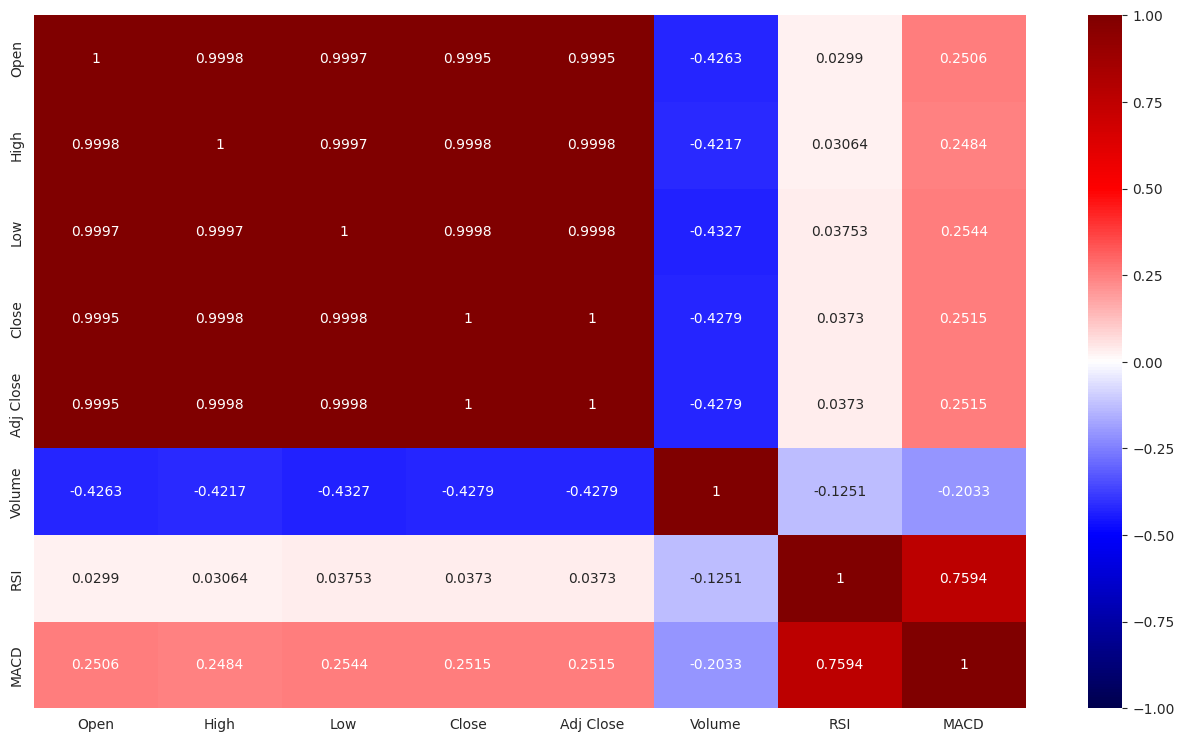

,Open,High,Low,Close,Adj Close,Volume,RSI,MACD
0,-1.251302,-1.249177,-1.249740,-1.248773,-1.248773,2.274832,0.805237,-0.094708
1,-1.247619,-1.245921,-1.246920,-1.248492,-1.248492,1.934722,0.822216,-0.082362
2,-1.244671,-1.239620,-1.242214,-1.238938,-1.238938,2.613570,1.340455,-0.051985
3,-1.240587,-1.241001,-1.240253,-1.241089,-1.241089,0.924759,1.107613,-0.035303
4,-1.240527,-1.243035,-1.244412,-1.242058,-1.242058,0.955858,1.000964,-0.026765
...,...,...,...,...,...,...,...,...
2763,2.028010,2.018011,2.067770,2.045610,2.045610,-0.587780,0.982887,0.905827
2764,2.049914,2.036220,2.080740,2.046411,2.046411,-0.959144,0.987189,1.140547
2765,2.049914,2.020386,2.045613,2.015707,2.015707,-0.850481,0.666560,1.236723
2766,2.028277,1.995578,2.041830,2.011969,2.011969,-0.987168,0.627149,1.286548


In [6]:
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

data_aapl_std = pd.DataFrame(preprocessing.scale(datas['GOOGL']), columns=datas['GOOGL'].columns)

#big heatmap seaborn
plt.figure(figsize=(16,9))
sns.heatmap(data_aapl_std.corr(method='spearman'), annot=True,fmt='.4g',vmin=-1,vmax=1,cmap='seismic')
plt.show()
# sns.heatmap(datas['AAPL'].corr(method='pearson'), annot=True)
data_aapl_std

## TODO: Revisar

In [23]:
# Función para crear las secuencias de entrenamiento
def create_dataset(data, sequence_length):
    X = []
    label = []
    for i in range(len(data.index) - sequence_length):
        sequence = [[price,vol,macd] for price,vol, macd in zip(data['Adj Close'].values[i:i + sequence_length], data.Volume.values[i:i + sequence_length], data.MACD.values[i:i + sequence_length])] # ejemplo con mas de 1 variable
        # sequence = [[price] for price in data_price[i:i + sequence_length]] # se pueden agregar más variables
        label.append(data.RSI.values[i + sequence_length])
        # print(label)
        X.append(sequence)
    return np.array(X), np.array(label)

In [24]:
def prepare_dataset(data):
    # Normalizar los datos
    scaler = MinMaxScaler(feature_range=(0, 1))
    normalized_data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
    
    # Crear las secuencias de entrenamiento
    X, y = create_dataset(normalized_data, sequence_length)    
    
    X_train = X[: 8*(len(X))//10]
    y_train = y[: 8*(len(X))//10]

    X_val= X[8*(len(X))//10 :]
    y_val = y[8*(len(X))//10 :]
    
    # X_test = X[7*(len(X))//10 : 9*(len(X))//10]
    # y_test = y[7*(len(X))//10 : 9*(len(X))//10]
    # 
    # X_val = X[9*(len(X))//10 :]
    # y_val = y[9*(len(X))//10 :]
    
    return X_train, X_val,  y_train, y_val

X_train, X_val, y_train, y_val = prepare_dataset(datas['GOOGL'])
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((2203, 14, 3), (551, 14, 3), (2203,), (551,))

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanAbsoluteError, MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from keras.layers import InputLayer, LSTM, Bidirectional, Dropout, Dense, Activation


In [28]:
from keras.src.layers import Bidirectional

# Construir el modelo LSTM para predecir el RSI
# model = Sequential()

# model.add(InputLayer(shape=(sequence_length,1)))
# model.add(LSTM(50))
# model.add(Dropout(0.2))
# model.add(Dense(8, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(1, activation='sigmoid'))  # Capa con función de activación 'sigmoid' ya que es una funcion de activacion que calcula la probabilidad de ser de x tipo, y como al igual que el RSI va de 0 a 100, se aprovecha este particular para usarla.
# model.summary()

# Parámetros
sequence_length = 14
dropout_rate_1 = 0.2
dropout_rate_2 = 0.3
numero_neuronas_capa_oculta_1 = 50
numero_neuronas_capa_oculta_2 = 8

# Definición del modelo
model = Sequential()

# Capa de entrada
model.add(InputLayer(shape=(sequence_length, 3)))

# Capa Bidirectional LSTM
model.add(Bidirectional(LSTM(numero_neuronas_capa_oculta_1)))

# Capa de Dropout
model.add(Dropout(dropout_rate_1))

# Capa Dense
model.add(Dense(numero_neuronas_capa_oculta_2, activation='relu'))

# Capa de Dropout
model.add(Dropout(dropout_rate_2))

# Capa Attention
# model.add(AttentionLayer())

# Capa Dense final con función de activación sigmoide
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 100)            │        21,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,417 (87.57 KB)

 Trainable params: 22,417 (87.57 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
c=0
remaining = len(datas)
for k,v in datas.items():
    c+=1
    X_train, X_val, y_train, y_val = prepare_dataset(datas[k])
    print(k)
    print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)
    print(f'{c}/{remaining} modelos entrenados')

    cp_name = f'./model_4_variables_{sequence_length}_periods_dropout.keras'
    cp = ModelCheckpoint(cp_name, save_best_only=True, monitor='val_loss')
    # early_stopping = EarlyStopping(monitor='val_loss', patience=10)

    model.compile(loss=MeanSquaredError(), optimizer= Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])  # Cambiar a 'mean_absolute_error'

    # Entrenar el modelo para predecir el RSI
    model.fit(X_train, y_train, validation_data = (X_val, y_val) ,epochs=150, batch_size=220, callbacks=[cp])




NVDA
(2203, 14, 3) (551, 14, 3) (2203,) (551,)
1/50 modelos entrenados
Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0466 - root_mean_squared_error: 0.2146 - val_loss: 0.0192 - val_root_mean_squared_error: 0.1447
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0280 - root_mean_squared_error: 0.1667 - val_loss: 0.0226 - val_root_mean_squared_error: 0.1552
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0282 - root_mean_squared_error: 0.1668 - val_loss: 0.0204 - val_root_mean_squared_error: 0.1495
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0274 - root_mean_squared_error: 0.1661 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1480
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0280 - root_mean_squared_error: 0.1669 - val_loss: 0.0215 - val_root_mean_squared_error: 0.1539
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0265 - root_mean_squared_error: 0.1625 - val_loss: 0.0295 - val_root_mean_squ

In [41]:
# model = load_model('./model_14_periods_dropout_safe.keras')
# Realizar las predicciones del RSI
scaler = MinMaxScaler(feature_range=(0, 1))
test_data = yf.download('MMM', start="2012-01-01", end="2023-12-31")
test_data['RSI'] = TA.RSI(test_data,14).fillna(0)
rsi = test_data['RSI']
test_data['MACD'] = (TA.MACD(test_data).fillna(0))['MACD']
dates = test_data.index.to_numpy()
tmp_data_norm = pd.DataFrame(scaler.fit_transform(test_data),columns=test_data.columns)
test_data_norm = pd.DataFrame(scaler.fit_transform(test_data.iloc[sequence_length:]),columns=test_data.columns)

# prices = (np.array(test_data['Adj Close'].values))
# rsi = np.array(calculate_rsi(prices))
# prices = scaler.fit_transform(prices.reshape(-1,1))
# rsi_norm = scaler.fit_transform(np.array(test_data['RSI']).reshape(-1,1))
data2 = create_dataset(tmp_data_norm,14)

all_predictions = model.predict(data2)
print(all_predictions.min())
# Desnormalizar las predicciones del RSI para obtener los valores reales
test_data_norm['RSI'] = all_predictions
all_predictions = scaler.inverse_transform(test_data_norm)
# display(test_data_norm)
all_predictions = test_data_norm['RSI'] * 100

# Imprimir los valores RSI predichos para todo el período
predicted_rsi = pd.Series(np.array(rsi[sequence_length:]).reshape(-1,), index=dates[sequence_length:])
predicted_rsi['Predicted_RSI'] = all_predictions
#print(predicted_rsi)

# Imprimir los valores del RSI original y del RSI predicho con un bucle for
for date, rsi_value, predicted_rsi_value in zip(predicted_rsi.index, predicted_rsi, predicted_rsi['Predicted_RSI']):
    print(f"{date}: RSI={rsi_value:.2f}, Predicted_RSI={predicted_rsi_value:.2f}")

# Crear una lista con los valores predichos del RSI
predicted_rsi_values = np.array(predicted_rsi['Predicted_RSI'])

# Imprimir la lista de valores predichos del RSI
#print(predicted_rsi_values)

[*********************100%%**********************]  1 of 1 completed


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
0.053366825
2012-01-24 00:00:00: RSI=70.65, Predicted_RSI=0.00
2012-01-25 00:00:00: RSI=74.26, Predicted_RSI=1.00
2012-01-26 00:00:00: RSI=79.64, Predicted_RSI=2.00
2012-01-27 00:00:00: RSI=77.73, Predicted_RSI=3.00
2012-01-30 00:00:00: RSI=75.77, Predicted_RSI=4.00
2012-01-31 00:00:00: RSI=66.33, Predicted_RSI=5.00
2012-02-01 00:00:00: RSI=70.37, Predicted_RSI=6.00
2012-02-02 00:00:00: RSI=70.84, Predicted_RSI=7.00


In [159]:
#import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

array([[53.629242],
       [53.216743],
       [53.442287],
       ...,
       [52.766777],
       [52.708046],
       [52.695877]], dtype=float32)

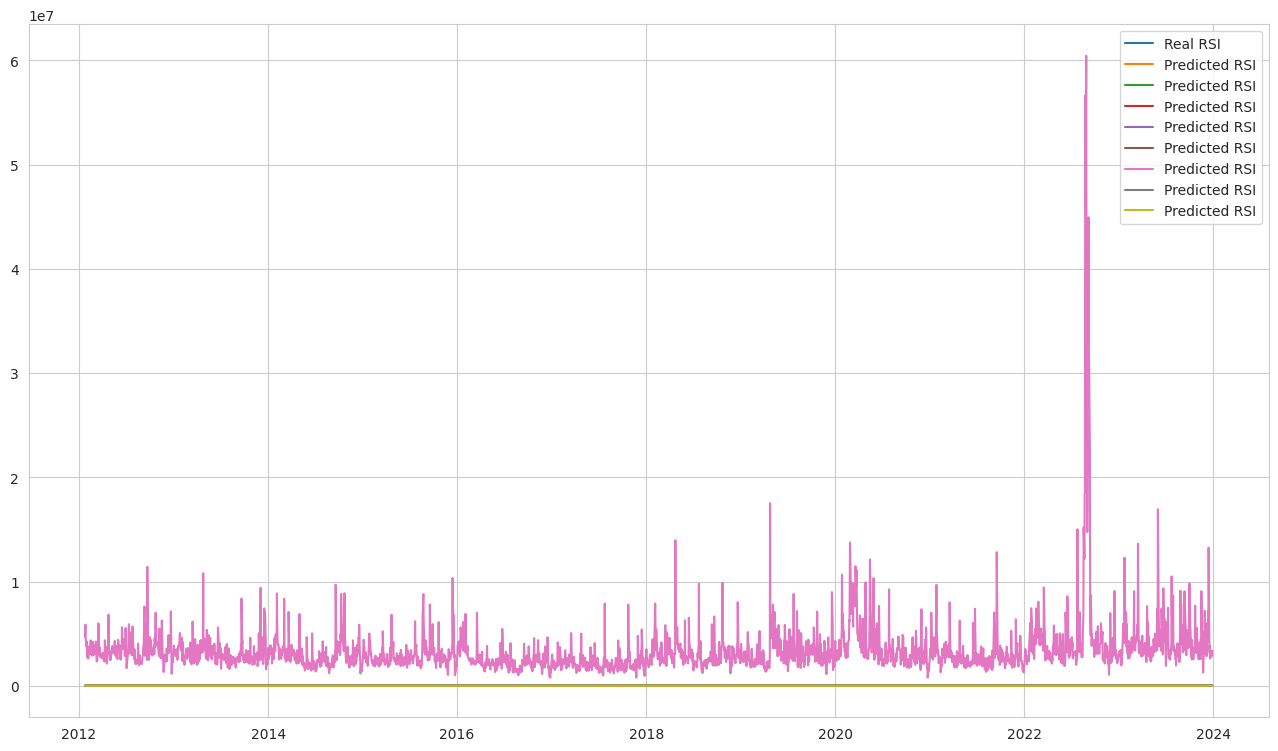

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))
plt.plot(dates.astype('datetime64[ns]')[14:],rsi[13:-1],label='Real RSI')
plt.plot(dates.astype('datetime64[ns]')[14:],all_predictions,label='Predicted RSI')
plt.legend()
plt.show()


In [25]:
#predicted_rsi_values

In [39]:
# Calcular las métricas para las predicciones del modelo LSTM
capital_inicial = 100000
costo_inversion = 5000

prices = test_data['Adj Close'].values
# Inicializar variables y listas para el análisis de rendimiento
capital_actual = capital_inicial
posiciones = []
rendimientos = []

# Recorrer todas las fechas para realizar las operaciones de compra y venta
for i in range(sequence_length,len(dates) - sequence_length):
    date = dates[i]
    # print(len(dates))
    rsi_value = predicted_rsi_values[i]

    if rsi_value < 30:
        signal = 'Compra'
    elif rsi_value > 70:
        signal = 'Venta'
    else:
        signal = 'Neutral'

    if signal == 'Compra':
        # Calcula la cantidad de acciones que puedes comprar con el costo de inversión fijo
        cantidad_acciones = int(costo_inversion / prices[i])
        # Resta el costo de la inversión del capital disponible
        capital_actual -= costo_inversion
        # Agrega la posición a la lista de posiciones con el precio de compra
        posiciones.append({'Fecha': date, 'Cantidad': cantidad_acciones, 'Precio de compra': prices[i]})

    elif signal == 'Venta':
        for posicion in posiciones:
            cantidad_acciones = posicion['Cantidad']
            precio_compra = posicion['Precio de compra']
            precio_venta = prices[i]
            rentabilidad = (precio_venta - precio_compra) / precio_compra
            rendimientos.append(rentabilidad)

            capital_actual += cantidad_acciones * precio_venta

        posiciones = []

# Calcula el rendimiento acumulado
rendimiento_acumulado = (capital_actual - capital_inicial) / capital_inicial

# Calcula la rentabilidad total considerando todas las operaciones realizadas
rentabilidad_total = np.prod(1 + np.array(rendimientos))

# Imprime la rentabilidad total después de vender todas las acciones compradas
print("Rentabilidad total después de vender todas las acciones compradas:", rentabilidad_total)

# Imprime las métricas adicionales según lo que necesites
print("Métricas:")
print("Rendimiento acumulado:", rendimiento_acumulado)

# Número total de operaciones realizadas (compras y ventas)
num_operaciones = len(rendimientos)
print("Número total de operaciones:", num_operaciones)

# Número de operaciones ganadoras y perdedoras
num_operaciones_ganadoras = len([rendimiento for rendimiento in rendimientos if rendimiento >= 0])
num_operaciones_perdedoras = len([rendimiento for rendimiento in rendimientos if rendimiento < 0])
print("Número de operaciones ganadoras:", num_operaciones_ganadoras)
print("Número de operaciones perdedoras:", num_operaciones_perdedoras)

# Rendimiento promedio de operaciones ganadoras y perdedoras
rendimiento_promedio_ganadoras = np.mean([rendimiento for rendimiento in rendimientos if rendimiento >= 0])
rendimiento_promedio_perdedoras = np.mean([rendimiento for rendimiento in rendimientos if rendimiento < 0])
print("Rendimiento promedio de operaciones ganadoras:", rendimiento_promedio_ganadoras)
print("Rendimiento promedio de operaciones perdedoras:", rendimiento_promedio_perdedoras)

Rentabilidad total después de vender todas las acciones compradas: 5.523445886755813e-32
Métricas:
Rendimiento acumulado: -3.541617694015503
Número total de operaciones: 655
Número de operaciones ganadoras: 78
Número de operaciones perdedoras: 577
Rendimiento promedio de operaciones ganadoras: 0.029595358722500038
Rendimiento promedio de operaciones perdedoras: -0.11572523867991877
